# Getting Started in Machine Learning
### Chapter 12: Neural Networks
This notebook contains examples from the book:

Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019.

<font style="font-size:xx-small; font-family:courier;">

    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Demonstrate Simple Perceptron in 2D

In [2]:
from math import exp
def sigma(x): # step function
    return(0 if x < 0 else 1)
def logistic(x):
    return 1/(1+exp(-x))

In [3]:
xlist=np.linspace(-10,10,100)
ylist=[sigma(x) for x in xlist]
yllist=[logistic(x) for x in xlist]

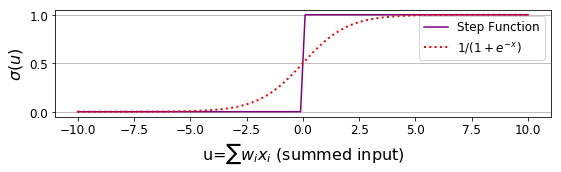

In [4]:
plt.plot(xlist,ylist,label="Step Function", color="purple")
plt.plot(xlist,yllist,label="$1/(1+e^{-x})$",color="red",ls=":",lw=2)
plt.legend(fontsize=12)
plt.xlabel("u=$\sum w_i x_i$ (summed input)",fontsize=16)
plt.ylabel("$\sigma(u)$",fontsize=16)
plt.grid(which="major",axis="y")
plt.gca().tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.gcf().set_size_inches(8,2.5)
plt.gcf().tight_layout()
#plt.gcf().savefig("NNet-Threshold-Function.pdf")

Define a simple 2-D linearly separable network

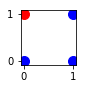

In [5]:
data= [((0, 0), 1), ((0, 1), 0), ((1, 0), 1), ((1, 1), 1)]
colors=["red","blue"]
for (x,y),cl in data:
    plt.scatter(x,y,color=colors[cl],s=100)
plt.gcf().set_size_inches(1,1)
#plt.gcf().savefig("littlebox.pdf")

### Implement the Perceptron

In [6]:
def perceptron(data, steps,eta=.5, save=False):
    w=np.random.random(3)
    xvecs = [np.array([1,*x]) for x,y in data]
    yvals = [y for x,y in data]
    if save: 
        history=[list(w)]
    for j in range(steps):
        for xvec, y in zip(xvecs,yvals):
            output = sigma(xvec.dot(w))
            err=y-output
            w+=err*eta*xvec
            if save: 
                history.append(list(w))
    if save: return(np.array(history).T)
    return(w)
wfinal=perceptron(data,2,save=False)
wfinal

array([-0.4409327,  0.9217301, -0.059808 ])

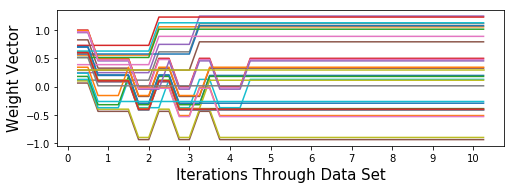

In [7]:
nruns=10
n=10; d=len(data)
for j in range(nruns):
    results = perceptron(data,n,eta=.5,save=True)
    for feature in results:
        plt.plot(range(1,1+len(feature)), feature)
plt.xticks(range(0,n*d+1,d),range(0,n+2))
plt.xlabel("Iterations Through Data Set",fontsize=15)
plt.ylabel("Weight Vector", fontsize=15)
plt.gcf().set_size_inches(8,2.5)
#plt.gcf().savefig("NNet-Weights-Vs-Time.pdf")

### Run the perceptron 25 times on the 2D data and plot the linear separation for each result

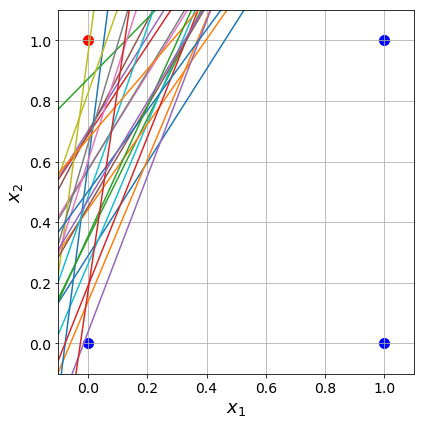

In [8]:
colors=["red","blue"]
for (x,y),cl in data:
    plt.scatter(x,y,color=colors[cl],s=100)
xplot=[-.1,1.1]
nruns=25
for j in range(nruns):
    w=perceptron(data,10)
    m=-w[1]/w[2]
    b=-w[0]/w[2]
    yplot=[m*x+b for x in xplot]
    plt.plot(xplot,yplot)
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.grid()
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$x_2$",fontsize=18)
plt.gca().tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.gcf().set_size_inches(6,6)
plt.gcf().tight_layout()
#plt.gcf().savefig("perceptron-4-points-multiple-runs.pdf")

## A non-separable data set

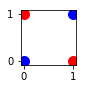

In [9]:
data= [((0, 0), 1), ((0, 1), 0), ((1, 0), 0), ((1, 1), 1)]
colors=["red","blue"]
for (x,y),cl in data:
    plt.scatter(x,y,color=colors[cl],s=100)
plt.gcf().set_size_inches(1,1)

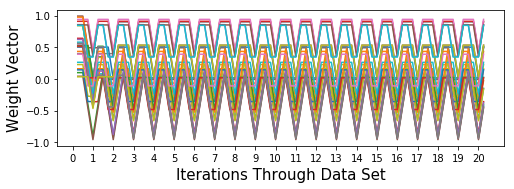

In [10]:
nruns=10
n=20; d=len(data)
for j in range(nruns):
    results = perceptron(data,n,save=True)
    for feature in results:
        plt.plot(range(1,1+len(feature)), feature)
plt.xticks(range(0,n*d+1,d),range(0,n+2))
plt.xlabel("Iterations Through Data Set",fontsize=15)
plt.ylabel("Weight Vector", fontsize=15)
plt.gcf().set_size_inches(8,2.5)
#plt.gcf().savefig("NNet-Weights-Non-Separable.pdf")

## Read Both Wine Quality Files

https://archive.ics.uci.edu/ml/datasets/wine+quality

citation:
  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.


In [11]:
red=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
               sep=";")
white=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
               sep=";")
print(red[:5])
print(white[:5])

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# Generate a single file with wine properties, but remove the quality flag

In [12]:
XRED=np.array(red.drop(columns=["quality"]))
XWHITE=np.array(white.drop(columns=["quality"]))

In [13]:
XRED[:3]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00]])

In [14]:
XWHITE[:3]

array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
        1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00],
       [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
        1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00],
       [8.100e+00, 2.800e-01, 4.000e-01, 6.900e+00, 5.000e-02, 3.000e+01,
        9.700e+01, 9.951e-01, 3.260e+00, 4.400e-01, 1.010e+01]])

In [15]:
X=np.vstack([XRED,XWHITE])
print(len(XRED),len(XWHITE),len(X))

1599 4898 6497


## Define exemplar (Y) values as 1 for red and 0 for white whine

In [16]:
Y=[*(len(XRED)*[1]),*(len(XWHITE)*[0])]
len(Y)

6497

## build, run, and evaluate an ANN with sklearn

In [17]:
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, \
  precision_score, roc_auc_score, accuracy_score,confusion_matrix,roc_curve
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)
print(len(XTRAIN),len(YTRAIN),len(XTEST),len(YTEST))
r = ANN(solver='lbfgs', alpha=1e-5,
          hidden_layer_sizes=(3,4,4), random_state=1)
r.fit(XTRAIN,YTRAIN)
YP=r.predict(XTEST)
print(confusion_matrix(YTEST,YP))
print("Accuracy= ",accuracy_score(YTEST,YP))
print("Recall=   ",recall_score(YTEST,YP))
print("Precision=",precision_score(YTEST,YP) )

4872 4872 1625 1625
[[1205   18]
 [  19  383]]
Accuracy=  0.9772307692307692
Recall=    0.9527363184079602
Precision= 0.9551122194513716


In [18]:
r.coefs_

[array([[-0.10864335,  0.28805642, -0.48962078],
        [-0.25880658, -0.46264613, -8.32645546],
        [-0.41078048, -0.20215757,  1.90065897],
        [ 0.05082287, -0.10554509,  0.14187777],
        [-0.38696159,  0.49506951, -1.76203628],
        [ 0.22319364, -0.10828031, -0.04543999],
        [-0.4708425 , -0.39400533,  0.05538704],
        [ 0.61309634, -0.24428593,  1.63834396],
        [ 0.49280749,  0.51665862, -1.52454224],
        [-0.60351701, -0.43224857, -5.73071513],
        [-0.52588574, -0.10364053,  0.90328376]]),
 array([[ 0.3453315 ,  0.61960434, -0.89195391,  0.46317577],
        [ 0.90232037,  0.45951202, -0.40654359,  0.53870397],
        [-0.7346803 , -0.09648213,  2.93765882, -0.37851069]]),
 array([[-0.50012346, -0.40170897, -0.01601976, -0.77359626],
        [ 0.12837504, -0.61188208,  0.15468123,  0.34599051],
        [-0.72035213, -4.6320692 ,  2.00756272, -0.14864539],
        [-1.08104909,  0.51326489,  0.06330153,  0.02578862]]),
 array([[-0.26579179]

In [19]:
r.intercepts_

[array([0.04342355, 0.25122371, 1.25984519]),
 array([-0.39594268, -0.68505397,  0.03301381,  0.99192807]),
 array([-0.16179625,  1.20012139,  0.71370325, -0.62791223]),
 array([2.12429993])]

## plot the ROC curve for the Red Wine identification

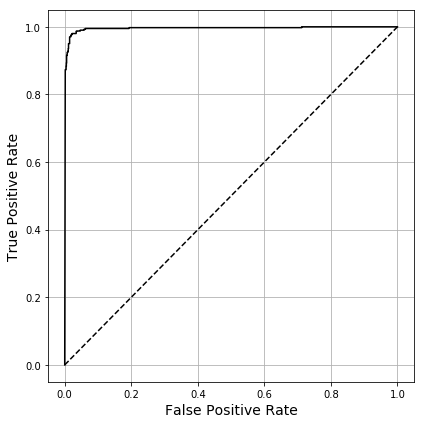

In [20]:
YPROB=r.predict_proba(XTEST)[:,1]
fpr, tpr, threshold = roc_curve(YTEST,YPROB)
plt.plot(fpr,tpr, c="k")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid()
plt.plot([0,1],[0,1],ls="--", c="k")
fig=plt.gcf()
fig.set_size_inches(6,6)
fig.tight_layout()
#fig.savefig("ROC-CURVE-NNET-RedWineClassificiation.pdf")

## Compare with Logistic Regression, All features and feature by feature

In [21]:
print(red.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [22]:
from sklearn.linear_model import LogisticRegression as LR

In [23]:
names=red.columns
def LRC(column, X,Y):
    x=X[:,column].reshape(-1,1)
    xtrain,xtest,ytrain,ytest=train_test_split(x,Y)
    model=LR().fit(xtrain,ytrain)
    YP=model.predict_proba(xtest)[:,1]
    FPR,TPR,TH=roc_curve(ytest,YP)
    return(FPR,TPR)

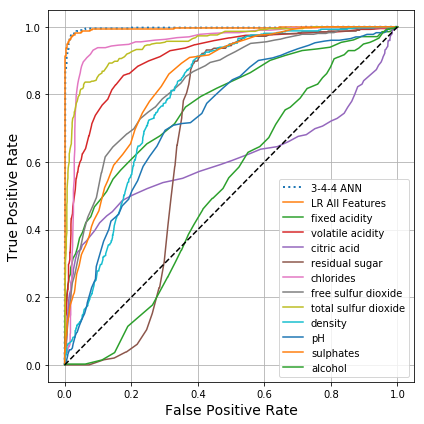

In [28]:
plt.plot(fpr,tpr, ls=":",lw=2,label="3-4-4 ANN")
XTRAIN,XTEST,YTRAIN,YTEST=train_test_split(X,Y)
lrmodel=LR().fit(XTRAIN,YTRAIN)
YPLR=lrmodel.predict_proba(XTEST)[:,1]
LRfpr, LRtpr, LRthreshold = roc_curve(YTEST, YPLR)
plt.plot(LRfpr,LRtpr,label="LR All Features")

for j in range(11):
    FPR,TPR=LRC(j,X,Y)
    plt.plot(FPR,TPR,label=names[j])
plt.legend()
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid()
plt.plot([0,1],[0,1],ls="--", c="k")
fig=plt.gcf()
fig.set_size_inches(6,6)
fig.tight_layout()
#fig.savefig("ROC-CURVE-ANN-vs-LOGISTIC-Wine.pdf")

## Code for visualizing a neural network

In [29]:
from graphviz import Digraph
# see https://graphviz.readthedocs.io
from os.path import isfile
def uniqueFileName(filename, type=""):    
    nameparts = filename.rsplit(".",1)
    if len(nameparts)<2:
        nameparts.append(type)
    left, right = nameparts
    i = 1
    fname = left+"."+right
    while isfile(fname):
        fname = left+str(i)+"."+right
        i += 1
    return(fname)

def VisualizeNN(hidden, inputs, outputs, file="NNVisualization"):
    layers=[len(inputs),*hidden,len(outputs)]
    dot=Digraph()
    i=1
    def nodename(i,j):
        return "L["+str(i)+"]["+str(j)+"]"
    for layer in layers:  
        for j in range(1,layer+1):
            if i==1:
                thelabel=inputs[j-1]
                theshape="ellipse"
            elif i==len(layers):
                thelabel=outputs[j-1]
                theshape="ellipse"
            else:
                thelabel=" "
                theshape="circle"
            dot.node(nodename(i,j),label=thelabel,shape=theshape)
            if i>1:
                thisnode=nodename(i,j)
                ilowerlayer=i-1
                ilowerlayers=layers[ilowerlayer-1]
                for k in range(1,ilowerlayers+1):
                    dot.edge(nodename(ilowerlayer,k),thisnode)#,         
        i+=1
    outputfile=uniqueFileName(file,type="gv")
    dot.render(outputfile, view=True)

Add newlines to long labels because otherwise it will take up a lot of space

In [30]:
input_labels=list(set([x.replace(" ","\n") for x in list(red.columns)])-set(["quality"]))
print(input_labels)
output_labels=["Output = 1 for Red Wine or 0 for White Wine"]

['volatile\nacidity', 'fixed\nacidity', 'chlorides', 'density', 'citric\nacid', 'sulphates', 'total\nsulfur\ndioxide', 'pH', 'residual\nsugar', 'free\nsulfur\ndioxide', 'alcohol']


In [31]:
VisualizeNN([3,4,4], input_labels,output_labels)

## Regression Model

In [33]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
print(data[:5])

    mpg  cyl  displ     hp  weight  accel  model  origin  \
0  18.0    8  307.0  130.0  3504.0   12.0     70       1   
1  15.0    8  350.0  165.0  3693.0   11.5     70       1   
2  18.0    8  318.0  150.0  3436.0   11.0     70       1   
3  16.0    8  304.0  150.0  3433.0   12.0     70       1   
4  17.0    8  302.0  140.0  3449.0   10.5     70       1   

                       carname  
0  "chevrolet chevelle malibu"  
1          "buick skylark 320"  
2         "plymouth satellite"  
3              "amc rebel sst"  
4                "ford torino"  


In [34]:
Y=data["mpg"]
Y[:5]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [35]:
X=data[["cyl", "displ","hp","weight","accel"]]
X[:5]


,cyl,displ,hp,weight,accel
0,8,307.0,130.0,3504.0,12.0
1,8,350.0,165.0,3693.0,11.5
2,8,318.0,150.0,3436.0,11.0
3,8,304.0,150.0,3433.0,12.0
4,8,302.0,140.0,3449.0,10.5


In [36]:
from sklearn.neural_network import MLPRegressor as REG
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

15.402482516615976 2.733075233052001


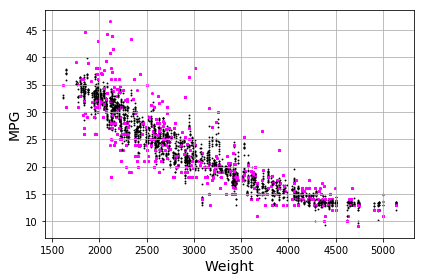

In [40]:
errors=[]
nruns=25
scaler = MinMaxScaler()
for j in range(nruns):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)
    
    XTRAINT=scaler.fit_transform(XTRAIN)
    XTESTT=scaler.transform(XTEST)
    
    
    r = REG(solver='lbfgs', alpha=1e-5,random_state=1,
          hidden_layer_sizes=(5,5,5))
    r.fit(XTRAINT,YTRAIN)
    YP=r.predict(XTESTT)
    errors.append(mean_squared_error(YP,YTEST))
    if j==0:
        plt.scatter(XTEST["weight"],YTEST,label="observed",marker="*",s=5,c="magenta")
        plt.scatter(XTEST["weight"],YP,label="predicted",marker=".",s=3,c="k")

    else:
        plt.scatter(XTEST["weight"],YTEST,marker="*",s=5,c="magenta")
        plt.scatter(XTEST["weight"],YP,marker=".",s=3,c="k")
plt.xlabel("Weight",fontsize=14)
plt.ylabel("MPG",fontsize=14)
plt.grid()
fig=plt.gcf()
fig.tight_layout()
print(np.mean(errors),np.std(errors))
#plt.gcf().savefig("ANN-REG-MPG-vs-Weight.pdf")

# Multi-class classification -- MNIST Digits file

code inspired by https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python
as per documentation at http://yann.lecun.com/exdb/mnist/

In [41]:
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, \
  precision_score, roc_auc_score, accuracy_score,confusion_matrix,roc_curve
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import gzip
import matplotlib.pyplot as plt
%matplotlib inline

function to read an MNIST image file and returns an array of pixels, one line per per image (28x28 pixels)

In [42]:
def read_MNIST_images(zipfile):
    image_size = 28
    num_images=1
    maximages=100000
    f = gzip.open(zipfile,'r')
    X=[]
    i=0
    f.read(16)
    while(True):
        buf = f.read(image_size * image_size * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        if (len(data)<1) or (i>maximages):
            break
        data = data.reshape(num_images, image_size, image_size, 1)
        data=np.ravel(data)
        X.append(data)
        i+=1
    return(X)

Function to read an MNIST Label file and return a list of labels

In [43]:
def read_MNIST_labels(zipfile):
    f = gzip.open(zipfile,'r')
    Y=[]
    buf=f.read(8)
    header=np.frombuffer(buf,dtype=np.uint8).astype(np.int64)
    expect=sum(header[4:]*np.array([256*256*256,256*256,256,1]))
    print(header, " expecting: ",expect,"flags")
    while (True):
        buf = f.read(1 * 32)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        if len(labels)>0:
            Y=Y+list(labels)
        else:
            break
    return (Y)

## Read the MNIST Files
The MNIST files must still be in their original gzip form, not unzipped

The source web page notes that some browsers may attempt to unzip the files for you; you should turn this process off before you run read_MNIST_images or read_MNIST_labels.

In [44]:
XTRAIN=read_MNIST_images('train-images-idx3-ubyte.gz')
print(len(XTRAIN),"images read")
XTEST=read_MNIST_images('t10k-images-idx3-ubyte.gz')
print(len(XTEST),"images read")

60000 images read
10000 images read


In [45]:
YTRAIN=read_MNIST_labels("train-labels-idx1-ubyte.gz")
print(len(YTRAIN), YTRAIN[:5])
YTEST=read_MNIST_labels("t10k-labels-idx1-ubyte.gz")
print(len(YTEST), YTEST[:5])

[  0   0   8   1   0   0 234  96]  expecting:  60000 flags
60000 [5, 0, 4, 1, 9]
[ 0  0  8  1  0  0 39 16]  expecting:  10000 flags
10000 [7, 2, 1, 0, 4]


## Function to display some of the MNIST digits as an image

display_MNIST(kmin) displays the 25 digits starting at location kmin

In [46]:
def display_MNIST(kmin,outfile="MNIST-digit-examples.pdf"):
    maxrows=5
    fig,ax=plt.subplots(nrows=maxrows,ncols=5)
    for irow in range(maxrows):
        for icol in range(5):
            k=5*irow+icol+kmin
            img=np.array(XTRAIN[k]).reshape(28,28)
            # subtract from 1 to reverse image
            ax[irow][icol].imshow(1-img, aspect="auto",cmap="gray")
            ax[irow][icol].set_xticks([])
            ax[irow][icol].set_yticks([])
    fig.set_size_inches(5,maxrows)
    fig.tight_layout()
    fig.savefig(outfile)

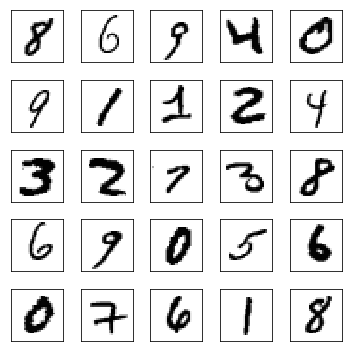

In [47]:
display_MNIST(17)

Transform the feature data to standard interval for classification

In [48]:
scaler = MinMaxScaler()
XTRAINT=scaler.fit_transform(XTRAIN)
XTESTT=scaler.transform(XTEST)

Classify with a neural network with 3 hidden layers of size 5, 5, 5

In [49]:
len(XTRAINT),len(YTRAIN)

(60000, 60000)

In [50]:
r = ANN(solver='lbfgs', alpha=1e-5,
          hidden_layer_sizes=(5,5,5), random_state=1)
r.fit(XTRAINT,YTRAIN)
YP=r.predict(XTESTT)
print(confusion_matrix(YTEST,YP))
print("Accuracy= ",accuracy_score(YTEST,YP))

[[ 798    4   11   37    0  119    4    1    6    0]
 [   0 1062    4    1    0    1    6    3   58    0]
 [   0   62  459  250    4   19  111   14  113    0]
 [   5   52  140  457    2  241   35    7   71    0]
 [   0   44    2    0  754    0    2  173    7    0]
 [ 119   37   68  204    2  413   16   12   21    0]
 [   4   99  204   47    2   11  215    7  369    0]
 [   0  136    3    0  442    1    5  431   10    0]
 [   3  298  106   28    3   13   85   11  427    0]
 [   2   38    4    8  653    0    2  291   11    0]]
Accuracy=  0.5016


Try again with a hidden layers (10, 10, 10)

In [51]:
r = ANN(solver='lbfgs', alpha=1e-5,
          hidden_layer_sizes=(10,10,10), random_state=1)
r.fit(XTRAINT,YTRAIN)
YP=r.predict(XTESTT)
print(confusion_matrix(YTEST,YP))
print("Accuracy= ",accuracy_score(YTEST,YP))

[[ 944    0    1    3    2   12   12    3    1    2]
 [   0 1091    5   10    1    2    1    1   23    1]
 [  13    1  902   48   14    1   16   17   15    5]
 [   7    4   30  869    1   48    2   14   25   10]
 [   2    2    5    0  878    2   18    0    7   68]
 [  17    0   12   68   15  684    9    8   65   14]
 [  24    1   12    0   13   15  880    0   13    0]
 [   5   11   22    7    2    1    0  918    0   62]
 [   4   21    9   27   33   89   13    2  764   12]
 [   8    6    1    6   97   23    3   21    9  835]]
Accuracy=  0.8765


In [52]:
accs=[]
for size in [5, 10, 20, 40, 80, 160, 320]:
    print("*****")
    print("Hidden layers =",(size, size, size))
    r = ANN(solver='lbfgs', alpha=1e-5,
          hidden_layer_sizes=(size, size, size), random_state=1)
    r.fit(XTRAINT,YTRAIN)
    YP=r.predict(XTESTT)
    print(confusion_matrix(YTEST,YP))
    acc=accuracy_score(YTEST,YP)
    accs.append(acc)
    print("Accuracy= ",acc)

*****
Hidden layers = (5, 5, 5)
[[ 798    4   11   37    0  119    4    1    6    0]
 [   0 1062    4    1    0    1    6    3   58    0]
 [   0   62  459  250    4   19  111   14  113    0]
 [   5   52  140  457    2  241   35    7   71    0]
 [   0   44    2    0  754    0    2  173    7    0]
 [ 119   37   68  204    2  413   16   12   21    0]
 [   4   99  204   47    2   11  215    7  369    0]
 [   0  136    3    0  442    1    5  431   10    0]
 [   3  298  106   28    3   13   85   11  427    0]
 [   2   38    4    8  653    0    2  291   11    0]]
Accuracy=  0.5016
*****
Hidden layers = (10, 10, 10)
[[ 944    0    1    3    2   12   12    3    1    2]
 [   0 1091    5   10    1    2    1    1   23    1]
 [  13    1  902   48   14    1   16   17   15    5]
 [   7    4   30  869    1   48    2   14   25   10]
 [   2    2    5    0  878    2   18    0    7   68]
 [  17    0   12   68   15  684    9    8   65   14]
 [  24    1   12    0   13   15  880    0   13    0]
 [   5   11  

In [53]:
accs

[0.5016, 0.8765, 0.9539, 0.9711, 0.9768, 0.9785, 0.979]

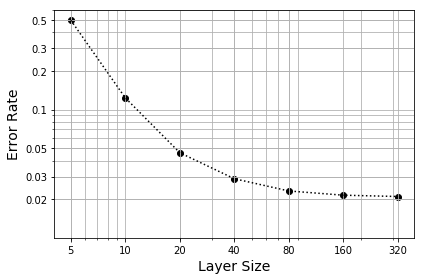

In [54]:
sizes=[5, 10, 20, 40, 80, 160, 320]
errs=1-np.array(accs)
plt.scatter(sizes, errs,c="k")
plt.plot(sizes,errs,c="k",ls=":")
plt.xlabel("Layer Size",fontsize=14)
plt.ylabel("Error Rate",fontsize=14)
plt.ylim([.01,.6])
plt.yscale("log")
plt.xscale("log")
plt.yticks([.02,.03,.05,.1,.2,.3,.5],[.02,.03,.05,.1,.2,.3,.5])
plt.xticks(sizes,sizes)
plt.grid(axis="both",which="both")
fig=plt.gcf()
fig.tight_layout()
#fig.savefig("nnet-error-rate-vs-layer-size-digits.pdf")